In [1]:
import os
import gc
import sys
import glob
import numpy as np
import pandas as pd
import netCDF4 as nc
from datetime import datetime, timedelta
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
import matplotlib.ticker as mticker

In [2]:
# To use PLUMBER2_GPP_common_utils, change directory to where it exists
os.chdir('/g/data/w97/mm3972/scripts/PLUMBER2/LSM_GPP_PLUMBER2')
from PLUMBER2_GPP_common_utils import *

In [3]:
# Path of PLUMBER 2 dataset
PLUMBER2_path      = "/g/data/w97/mm3972/data/PLUMBER2/"
PLUMBER2_flux_path = "/g/data/w97/mm3972/data/Fluxnet_data/Post-processed_PLUMBER2_outputs/Nc_files/Flux/"
PLUMBER2_met_path  = "/g/data/w97/mm3972/data/Fluxnet_data/Post-processed_PLUMBER2_outputs/Nc_files/Met/"
site_names, IGBP_types, clim_types, model_names = load_default_list()

In [4]:
model_colors ={0:'red', 1: 'darkorange',2:'orange',3:'gold',4:'yellowgreen',5:'green',6:'mediumseagreen',
               7:'lime',8:'springgreen',9:'cyan',10:'dodgerblue',11:'blue',12:'darkolivegreen',
               13:'forestgreen',14:'lime',15:'gold', 16:'orange',17:'pink',18:'pink',19:'red',20:'deeppink',
               21:'mediumorchid',22: 'darkviolet',}

In [5]:
PLUMBER2_path_site = "/g/data/w97/mm3972/scripts/PLUMBER2/LSM_GPP_PLUMBER2/nc_files/AU-How.nc"
f                  = nc.Dataset(PLUMBER2_path_site, mode='r')
model_list         = f.variables['NEE_models'][:]
model_list         = model_list.tolist()
model_list.append('obs')

In [6]:
time       = nc.num2date(f.variables['CABLE_time'][:],f.variables['CABLE_time'].units,only_use_cftime_datetimes=False,only_use_python_datetimes=True)
ntime      = len(time)
year       = np.zeros(ntime)
month      = np.zeros(ntime)
day        = np.zeros(ntime)
hour       = np.zeros(ntime)
minute     = np.zeros(ntime)

for i,t in enumerate(time):
    year[i]  = t.year
    month[i] = t.month
    day[i]   = t.day
    hour[i]  = t.hour + t.minute/60.

In [7]:
hour

array([ 0.5,  1. ,  1.5, ..., 23. , 23.5,  0. ])

#### calculate diurnal centroid

In [9]:
model_in                 = 'obs'
var                      = pd.DataFrame(f.variables[model_in+'_NEE'][:].data, columns=['NEE'])
var['SWdown']            = f.variables['obs_SWdown'][:].data
var['Qair']              = f.variables['obs_Qair'][:].data
var['Tair']              = f.variables['obs_Tair'][:].data
var['VPD']               = f.variables['VPD'][:].data
var['GPP']               = f.variables[model_in+'_GPP'][:].data
var['Qle']               = f.variables[model_in+'_Qle'][:].data
var['year']              = year
var['month']             = month
var['day']               = day
var['hour']              = hour
var['NEE_times_hour']    = hour*var['NEE'][:]
var['GPP_times_hour']    = hour*var['GPP'][:]
var['SWdown_times_hour'] = hour*var['SWdown'][:]
var['Qle_times_hour']    = hour*var['Qle'][:]
var['Qair_times_hour']   = hour*var['Qair'][:]
var['VPD_times_hour']    = hour*var['VPD'][:]
var['Tair_times_hour']   = hour*var['Tair'][:]
var_tmp                  = var.groupby(['year','month','day']).sum(numeric_only=True).reset_index()

In [10]:
var_tmp['NEE_diurnal_centroid']    = var_tmp['NEE_times_hour'][:]/var_tmp['NEE'][:]
var_tmp['GPP_diurnal_centroid']    = var_tmp['GPP_times_hour'][:]/var_tmp['GPP'][:]
var_tmp['Qle_diurnal_centroid']    = var_tmp['Qle_times_hour'][:]/var_tmp['Qle'][:]
var_tmp['Qair_diurnal_centroid']   = var_tmp['Qair_times_hour'][:]/var_tmp['Qair'][:]
var_tmp['VPD_diurnal_centroid']    = var_tmp['VPD_times_hour'][:]/var_tmp['VPD'][:]
var_tmp['Tair_diurnal_centroid']   = var_tmp['Tair_times_hour'][:]/var_tmp['Tair'][:]
var_tmp['SWdown_diurnal_centroid'] = var_tmp['SWdown_times_hour'][:]/var_tmp['SWdown'][:]
var_tmp2                           = var_tmp.groupby(['month']).mean(numeric_only=True).reset_index()

In [11]:
var_tmp2

,month,year,day,NEE,SWdown,Qair,Tair,VPD,GPP,Qle,...,Qair_times_hour,VPD_times_hour,Tair_times_hour,NEE_diurnal_centroid,GPP_diurnal_centroid,Qle_diurnal_centroid,Qair_diurnal_centroid,VPD_diurnal_centroid,Tair_diurnal_centroid,SWdown_diurnal_centroid
0,1.0,2010.017167,15.967811,-0.001430,10113.398438,0.860062,14400.173828,39.423946,0.004356,5776.759766,...,10.083599,523.789627,169414.368190,15.352663,13.150864,13.093918,11.699903,13.152908,11.740009,12.954255
1,2.0,2010.000000,14.636792,-0.001520,10553.869141,0.859306,14422.566406,38.068329,0.004299,5760.231934,...,10.051723,513.022742,169685.396077,16.655136,13.359829,13.269229,11.700200,13.345912,11.765244,13.027208
2,3.0,2010.000000,16.000000,-0.001040,10718.400391,0.849148,14425.281250,40.581482,0.003807,5496.693848,...,9.924493,551.039982,169753.500472,22.995252,13.224364,13.288995,11.687279,13.492922,11.767756,13.005049
3,4.0,2010.000000,15.500000,-0.000777,11615.482422,0.738862,14425.811523,58.394997,0.003237,5316.969238,...,8.592460,794.288905,169890.265175,19.215764,13.291453,13.210110,11.633128,13.617106,11.776820,13.001490
4,5.0,2010.000000,16.000000,-0.000720,10768.555664,0.620002,14360.939453,64.712990,0.002633,4163.333984,...,7.274873,862.764130,169200.309202,19.374019,13.157979,13.042036,11.763056,13.395179,11.782007,12.932663
5,6.0,2010.000000,15.500000,-0.000874,10465.526367,0.485146,14276.103516,71.170753,0.002344,3433.643066,...,5.735739,939.160527,168291.414827,20.117386,13.201547,13.009611,11.862195,13.268032,11.788368,13.010670
6,7.0,2010.000000,16.000000,-0.000897,10889.861328,0.477880,14284.889648,74.118164,0.002148,2918.821289,...,5.584379,997.188137,168459.697382,12.667294,13.291677,13.182709,11.745261,13.546510,11.792902,13.088544
7,8.0,2010.000000,16.000000,-0.000695,11897.671875,0.491931,14314.601562,77.435387,0.001890,2633.410156,...,5.610614,1065.667356,168829.148694,13.754377,13.328899,13.166934,11.432966,13.828828,11.794218,13.084585
8,9.0,2010.000000,15.500000,-0.000235,12533.823242,0.622300,14416.473633,76.429298,0.001855,2852.535156,...,7.048109,1066.131237,169943.642659,14.255312,13.191115,13.149718,11.307167,13.934869,11.788174,12.919283
9,10.0,2010.000000,16.000000,-0.000350,12785.821289,0.705399,14475.822266,75.464958,0.002494,4053.947266,...,8.060550,1036.191158,170541.416166,10.316556,12.935827,13.028026,11.409043,13.682213,11.781103,12.735106


### Qle vs SWdown 

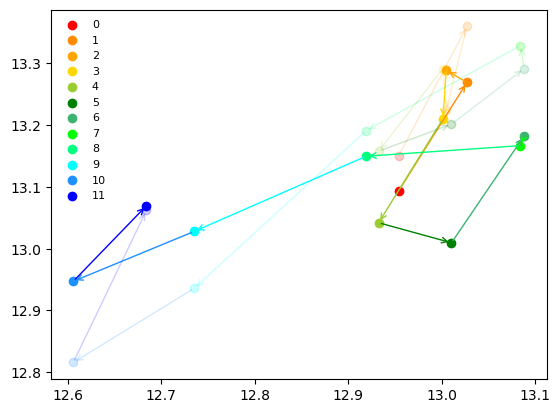

In [15]:
var_name1 = "SWdown"
var_name2 = "Qle"
var_name3 = "GPP"

fig, ax = plt.subplots()
for i in np.arange(len(var_tmp2)):
    ax.scatter(var_tmp2[var_name1+'_diurnal_centroid'][i],var_tmp2[var_name2+'_diurnal_centroid'][i],c=model_colors[i],label=str(i))
    ax.scatter(var_tmp2[var_name1+'_diurnal_centroid'][i],var_tmp2[var_name3+'_diurnal_centroid'][i],c=model_colors[i],alpha=0.2)
# Set y-axis limits
# Add arrows connecting the points
for i in np.arange(1, len(var_tmp2)):  # Start from 1 to access the previous point
    ax.annotate("",
                xy=(var_tmp2[var_name1+'_diurnal_centroid'][i], var_tmp2[var_name2+'_diurnal_centroid'][i]),
                xytext=(var_tmp2[var_name1+'_diurnal_centroid'][i-1], var_tmp2[var_name2+'_diurnal_centroid'][i-1]),
                arrowprops=dict(arrowstyle="->", color=model_colors[i]))
    ax.annotate("",
            xy=(var_tmp2[var_name1+'_diurnal_centroid'][i], var_tmp2[var_name3+'_diurnal_centroid'][i]),
            xytext=(var_tmp2[var_name1+'_diurnal_centroid'][i-1], var_tmp2[var_name3+'_diurnal_centroid'][i-1]),
            arrowprops=dict(arrowstyle="->", color=model_colors[i],alpha=0.2))
ax.legend(fontsize=8,frameon=False)
# ax.set_ylim(0, 24)

In [ ]:
var_name1 = "SWdown"
var_name2 = "Qle"

fig, ax = plt.subplots()
for i in np.arange(len(var_tmp2)):
    ax.scatter(var_tmp2[var_name1+'_diurnal_centroid'][i],var_tmp2[var_name2+'_diurnal_centroid'][i],c=model_colors[i],label=str(i))
# Set y-axis limits
# Add arrows connecting the points
for i in np.arange(1, len(var_tmp2)):  # Start from 1 to access the previous point
    ax.annotate("",
                xy=(var_tmp2[var_name1+'_diurnal_centroid'][i], var_tmp2[var_name2+'_diurnal_centroid'][i]),
                xytext=(var_tmp2[var_name1+'_diurnal_centroid'][i-1], var_tmp2[var_name2+'_diurnal_centroid'][i-1]),
                arrowprops=dict(arrowstyle="->", color=model_colors[i]))

ax.legend(fontsize=8,frameon=False)
# ax.set_ylim(0, 24)

#### Summary

There looks like seasonal differences. However, I didn't do any filtering on these data, so the calculated diurnal centriod of NEE/Qle/GPP looks wrong. So need to filter them and check the results again. 


Check the way to filter for diurnal centriod calcualtions